In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checkpoint 1: Data Cleaning 1



In [6]:
# Converting companies dataset into dataframe

companies = pd.read_csv("companies.txt",delimiter="\t",encoding='latin1')
companies['permalink'] = companies['permalink'].str.encode('latin1').str.decode('ascii', 'ignore')
companies['permalink'] = companies['permalink'].str.lower()
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [7]:
# converting rounds2 dataset into dataframe

rounds2 = pd.read_csv("rounds2.csv",encoding='latin1')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('latin1').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


<b>Unique companies present in rounds2 database</b>

In [8]:
#Unique values for company_permalink column in companies dataframe

a = rounds2['company_permalink'].unique()
print(len(a))

66368


<b>Unique companies present in companies database</b>

In [9]:
#Unique values for permalink column in rounds2 dataframe

b = companies['permalink'].unique()
print(len(b))

66368


<b>Are there any companies in the rounds2 file which are not present in companies?</b>

In [10]:
# checking for any value that is present in rounds2 and not in companies

s_a = set(a.flatten())
s_b = set(b.flatten())
l = len(s_a - s_b)
if(l==0):
    print('There are no companies in the rounds2 file which are not present in companies file.')
else:
    print('There are companies in the rounds2 file which are not present in companies file.')

There are no companies in the rounds2 file which are not present in companies file.


<b>Merge the dataframes to get master_frame</b>

In [11]:
# merge 

master_frame = pd.merge(rounds2,companies, how = 'left' ,left_on = rounds2['company_permalink'] , right_on = companies['permalink'] )

In [12]:
master_frame.head(2)

,key_0,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


<b>Number of obversations present in master_frame dataframe</b>

In [13]:
print(str(len(master_frame)) + ' observations are present in the merges dataframe.')

114949 observations are present in the merges dataframe.


<b>Dropping unnecessary columns from the master_frame database</b>

In [14]:
master_frame = master_frame.drop(columns = ['key_0','permalink','funding_round_code','founded_at','homepage_url','funded_at','status','state_code','region','city'],axis = 1)

# Checkpoint 2: Funding Type Analysis

In [15]:
# selecting only the funding type in which we are interested in that is 'Venture' , 'Seed' , 'Angel' , 'Private-equity'

master_frame = master_frame[(master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='angel') | (master_frame['funding_round_type']=='seed') | (master_frame['funding_round_type']=='private_equity')]

In [16]:
#converting raised amount USD to million dollars USD

master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
print('Count and avg investment in Seed, Angel, Venture, Private_equity.')
print('')
mean_invest = master_frame.groupby('funding_round_type').raised_amount_usd.mean()
count_invest = master_frame['funding_round_type'].value_counts()

print(mean_invest.to_frame(name = 'Average investment amount in each funding type.'))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print(count_invest.to_frame(name = 'Count of investment in each funding type.'))

Count and avg investment in Seed, Angel, Venture, Private_equity.

                    Average investment amount in each funding type.
funding_round_type                                                 
angel                                                      0.958694
private_equity                                            73.308593
seed                                                       0.719818
venture                                                   11.748949
-----------------------------------------------------------
-----------------------------------------------------------
                Count of investment in each funding type.
venture                                             55494
seed                                                30524
angel                                                6094
private_equity                                       2285


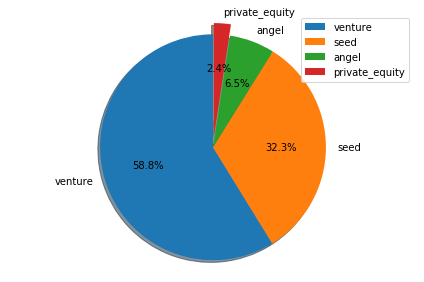

In [17]:
# Count of funding type fraction for each funding type

fig1, ax1 = plt.subplots()
labels = count_invest.index
sizes = count_invest.values

colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
 
explode = (0, 0, 0, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance=1.1)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels)
plt.show()



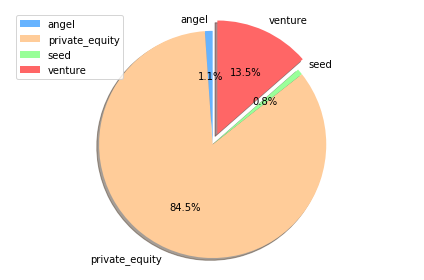

In [18]:
#Average amount of investement fraction for funding type

fig1, ax1 = plt.subplots()
labels_2 = mean_invest.index
sizes_2 = mean_invest.values
explode = (0, 0, 0, 0.1)
colors = ['#66b3ff' ,'#ffcc99', '#99ff99','#ff6666']
ax1.pie(sizes_2, colors = colors ,explode=explode, labels=labels_2, autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance=1.1)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels_2)

plt.show()

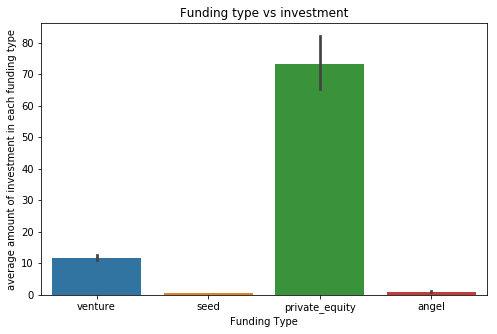

In [19]:
# plotting funding type vs avg amount of investments in each funding type

plt.figure(figsize=(8, 5))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame).set(title = 'Funding type vs investment', xlabel = 'Funding Type' , ylabel = 'average amount of investment in each funding type' )
plt.show()

<b>Venture funding type is suitable for Spark Funding as it falls between the range of 5 million USD to 15 million USD.</b>

In [20]:
#Converting whole dataframe to only venture type

master_frame = master_frame[master_frame['funding_round_type']=='venture']

# Checkpoint 3: Country Analysis

In [21]:
#Country wise analysis for total funding received by top 9 countries

c = master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
c

country_code
USA    422510.842796
CHN     39835.418773
GBR     20245.627416
IND     14391.858718
CAN      9583.332317
FRA      7259.536732
ISR      6907.514579
DEU      6346.959822
JPN      3363.676611
Name: raised_amount_usd, dtype: float64

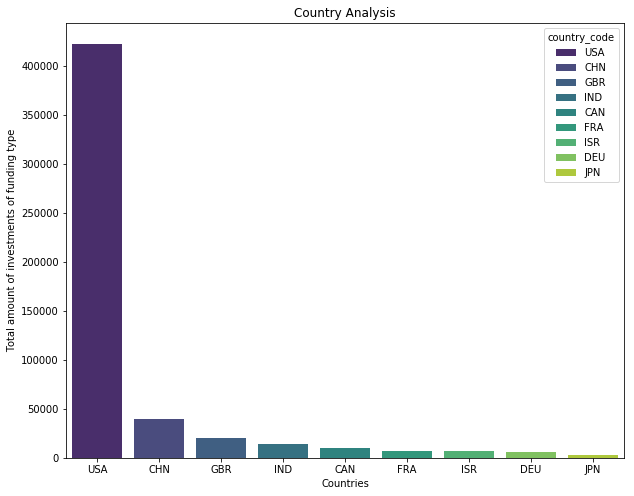

In [22]:
# Plot showing the top 9 countries against the total amount of investments of funding type

plt.figure(figsize=(10, 8))
x_val = c.index
y_val = c.values
sns.barplot(x = x_val, y = y_val, data=master_frame, palette="viridis", hue = x_val, dodge= False).set(title = 'Country Analysis', xlabel = 'Countries' , ylabel = 'Total amount of investments of funding type' )
plt.show()

As Spark Funds wants to invest in top 3 English Speaking companies , The top 3 companies will be <b>USA, IND and GBR.</b>

# Checkpoint 4: Sector Analysis 1

In [23]:
# Getting main category type from category list
master_frame['primary_sector'] = 0
master_frame['primary_sector'] = master_frame['category_list'].str.split('|', expand=True)

In [24]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000000,#fame,Media,IND,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3.406878,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2.000000,0-6.com,Curated Web,CHN,Curated Web
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,004 Technologies,Software,USA,Software


<b>Reading mapping database </b>

In [25]:
# reading mapping data

mapping = pd.read_csv('mapping.csv')

In [26]:
# Few values in category_list dataframe contains '0' in place of 'na'. Thus replacing '0' by na 

mapping['category_list'] = mapping['category_list'].replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [27]:
#unpivoting the mapping database from wide format to long format

mapping = mapping.melt(id_vars = ['category_list'], value_vars= ['Automotive & Sports', 'Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging', 'Others','Social, Finance, Analytics, Advertising'])
mapping = mapping[mapping['value'] != 0]

In [28]:
#dropping and renaming columns

mapping = mapping.drop(columns = 'value', axis = 1)
mapping = mapping.rename(columns = {'variable' : 'Main Sector'})

In [29]:
mapping.head(2)

,category_list,Main Sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports


In [30]:
# merging mapping dataframe with master_frame on category_list column

master_frame = master_frame.merge( mapping , left_on = 'primary_sector' ,right_on = 'category_list' ,how = 'left')

In [31]:
master_frame = master_frame.drop(columns = ['category_list_y'],axis = 1)
master_frame = master_frame.rename(columns = {'category_list_x' : 'category_list'})
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000000,#fame,Media,IND,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms,"News, Search and Messaging"
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3.406878,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,Apps,"News, Search and Messaging"
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2.000000,0-6.com,Curated Web,CHN,Curated Web,"News, Search and Messaging"
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,004 Technologies,Software,USA,Software,Others


In [32]:
#seeing the values that have been left as blank after mapping

print(master_frame[master_frame['Main Sector'].isnull()].primary_sector.unique())

[nan 'Nanotechnology' 'English-Speaking' 'Navigation'
 'Enterprise Hardware' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Nightlife' 'Biotechnology and Semiconductor' 'Natural Resources'
 'Rapidly Expanding' 'Product Search' 'GreenTech' 'Retirement']


In [33]:
master_frame['Main Sector'].value_counts()

Others                                     12959
Social, Finance, Analytics, Advertising    11178
Cleantech / Semiconductors                 10647
News, Search and Messaging                  6954
Health                                      4393
Manufacturing                               3791
Entertainment                               3334
Automotive & Sports                          900
Name: Main Sector, dtype: int64

# Checkpoint 5: Sector Analysis 2

<font size="5">Dataframe C1 for IND</font>

In [34]:
# Creating separate dataframe for USA taking into consideration all the contraints given by the company

C1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]
C1_temp = C1[['raised_amount_usd','Main Sector']].groupby('Main Sector').agg(['sum', 'count'])
C1_temp.rename(columns = {'sum' : 'Total_amount', 'count': 'Total count'})
C1 = C1.merge(C1_temp, how='left', left_on ='Main Sector', right_on = 'Main Sector')

C:\Users\simrankaur.badan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [35]:
C1.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",23807.376964,2714.0
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging",13959.567428,1582.0


<b>Investment count for USA</b>

In [36]:
print('Total number of Investments - count wise for USA is ' + str(C1.raised_amount_usd.count()))

Total number of Investments - count wise for USA is 12150


<b>Total amount of investment in USA</b>

In [37]:
print('Total amount of investment in USA is ' + str(C1.raised_amount_usd.sum()) + ' million USD')


Total amount of investment in USA is 108531.347515 million USD


In [38]:
print('Total Number of investments and total amount of investment top 3 sectors in USA')
print('')
C1_count = C1.groupby('Main Sector').raised_amount_usd.count().nlargest(3)
C1_sum = C1.groupby('Main Sector').raised_amount_usd.sum().nlargest(3)
print(C1_sum.to_frame(name = 'Total amount invested in top 3 sectors in USA in million USD'))
print('---------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------')
print(C1_count.to_frame(name = 'Total number of investments in top 3 sectors in USA'))

Total Number of investments and total amount of investment top 3 sectors in USA

                                         Total amount invested in top 3 sectors in USA in million USD
Main Sector                                                                                          
Others                                                                        26321.007002           
Social, Finance, Analytics, Advertising                                       23807.376964           
Cleantech / Semiconductors                                                    21206.628192           
---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
                                         Total number of investments in top 3 sectors in USA
Main Sector                                                                                 
Others                                         

As per the data above top three sectors in <b>USA</b> are : <b>1) Others      2)Social, Finance, Analytics, Advertising	     3)Cleantech / Semiconductors</b>

<font size="5">Dataframe C2 for GBR</font>

In [39]:
# Creating separate dataframe for GBR taking into consideration all the contraints given by the company

C2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]
C2_temp = C2[['raised_amount_usd','Main Sector']].groupby('Main Sector').agg(['sum', 'count'])
C2_temp.rename(columns = {'sum' : 'Total_amount', 'count': 'Total count'})
C2 = C2.merge(C2_temp, how='left', left_on ='Main Sector', right_on = 'Main Sector')

C:\Users\simrankaur.badan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [40]:
C2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,5.500000,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising",1089.404014,133.0
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,8.468328,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment,482.784687,56.0


<b>Investment count for GBR</b>

In [41]:
print('Total number of Investments - count wise for GBR is ' + str(C2.raised_amount_usd.count()))

Total number of Investments - count wise for GBR is 628


<b>Total amount of investment in GBR</b>

In [42]:
print('Total amount of investment in GBR is ' + str(C2.raised_amount_usd.sum()) + ' million USD')

Total amount of investment in GBR is 5436.8435389999995 million USD


In [43]:
print('Total Number of investments and total amount of investment top 3 sectors in GBR')
print('')
C2_count = C2.groupby('Main Sector').raised_amount_usd.count().nlargest(3)
C2_sum = C2.groupby('Main Sector').raised_amount_usd.sum().nlargest(3)
print(C2_sum.to_frame(name = 'Total amount invested in top 3 sectors in GBR in million USD'))
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print(C2_count.to_frame(name = 'Total number of investments in top 3 sectors in GBR'))

Total Number of investments and total amount of investment top 3 sectors in GBR

                                         Total amount invested in top 3 sectors in GBR in million USD
Main Sector                                                                                          
Others                                                                         1283.624289           
Cleantech / Semiconductors                                                     1150.139665           
Social, Finance, Analytics, Advertising                                        1089.404014           
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
                                         Total number of investments in top 3 sectors in GBR
Main Sector                                                                                 
Others                                   

As per the data above top three sectors in <b>GBR</b> are : <b>1) Others      2)Social, Finance, Analytics, Advertising	     3)Cleantech / Semiconductors</b>

<font size="5">Dataframe C3 for IND</font>

In [44]:
C3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]
C3_temp = C3[['raised_amount_usd','Main Sector']].groupby('Main Sector').agg(['sum', 'count'])
C3_temp.rename(columns = {'sum' : 'Total_amount', 'count': 'Total count'})
C3 = C3.merge(C3_temp, how='left', left_on ='Main Sector', right_on = 'Main Sector')

C:\Users\simrankaur.badan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [45]:
C3.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000000,#fame,Media,IND,Media,Entertainment,280.830000,33.0
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,6.369507,21Diamonds,E-Commerce,IND,E-Commerce,Others,1013.409507,110.0


<b>Investment count for IND</b>

In [46]:
print('Total number of Investments - count wise for IND is ' + str(C3.raised_amount_usd.count()))

Total number of Investments - count wise for IND is 330


<b>Total amount of investment in IND</b>

In [47]:
print('Total amount of investment in IND is ' + str(C3.raised_amount_usd.sum())+ ' million USD.')

Total amount of investment in IND is 2976.5436019999997 million USD.


In [48]:
print('Total Number of investments and total amount of investment top 3 sectors in IND')
print('')
C3_count = C3.groupby('Main Sector').raised_amount_usd.count().nlargest(3)
C3_sum = C3.groupby('Main Sector').raised_amount_usd.sum().nlargest(3)
print(C3_sum.to_frame(name = 'Total amount invested in top 3 sectors in IND in million USD'))
print('---------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------')
print(C3_count.to_frame(name = 'Total number of investments in top 3 sectors in IND'))

Total Number of investments and total amount of investment top 3 sectors in IND

                                         Total amount invested in top 3 sectors in IND in million USD
Main Sector                                                                                          
Others                                                                         1013.409507           
Social, Finance, Analytics, Advertising                                         550.549550           
News, Search and Messaging                                                      433.834545           
---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
                                         Total number of investments in top 3 sectors in IND
Main Sector                                                                                 
Others                                         

As per the data above top three sectors in <b>IND</b> are : <b>1) Others      2)Social, Finance, Analytics, Advertising     3)News, Search and Messaging</b>

<font size="5">Plot for top 3 sectors in USA , GBR and IND</font>

In [49]:
C1_top_3 = C1[(C1['Main Sector']== 'Others') | (C1['Main Sector']=='Social, Finance, Analytics, Advertising') | (C1['Main Sector']== 'Cleantech / Semiconductors')]
C2_top_3 = C2[(C2['Main Sector']== 'Others') | (C2['Main Sector']=='Social, Finance, Analytics, Advertising') | (C2['Main Sector']== 'Cleantech / Semiconductors')]
C3_top_3 = C3[(C3['Main Sector']== 'Others') | (C3['Main Sector']=='Social, Finance, Analytics, Advertising') | (C3['Main Sector']== 'News, Search and Messaging')]
plot_top = pd.concat([C1_top_3,C2_top_3,C3_top_3])
plot_top.head()



,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",23807.376964,2714.0
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11.999347,128 Technology,Service Providers|Technology,USA,Service Providers,Others,26321.007002,2950.0
8,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,14.000000,170 Systems,Software,USA,Software,Others,26321.007002,2950.0
9,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,5.000000,17zuoye,Education|Language Learning,USA,Education,Others,26321.007002,2950.0
10,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,10.000000,17zuoye,Education|Language Learning,USA,Education,Others,26321.007002,2950.0


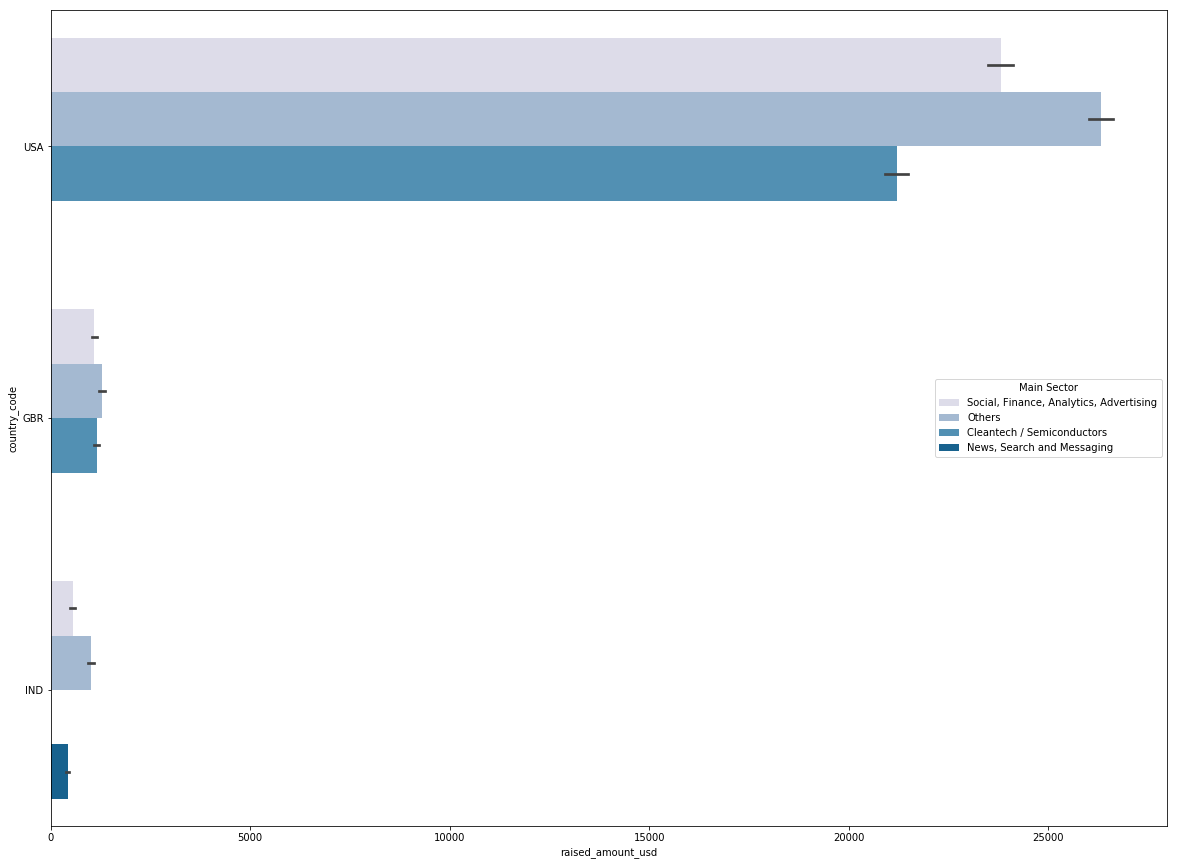

In [50]:
plt.figure(figsize=(20, 15))
y_val = c.index
x_val = c.values
sns.barplot(y='country_code', x='raised_amount_usd', hue="Main Sector", palette="PuBu",data = plot_top, estimator=sum)
plt.show()

<font size="5">Top sector count wise in USA is "Others"</font>

In [51]:
comp1_top = C1[C1['Main Sector']=='Others']
comp1_top.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11.999347,128 Technology,Service Providers|Technology,USA,Service Providers,Others,26321.007002,2950.0
8,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,14.000000,170 Systems,Software,USA,Software,Others,26321.007002,2950.0


In [52]:
comp1_top = comp1_top.groupby('name').raised_amount_usd.sum()

<b>Company which received the highest investment in top sector count-wise in USA</b>

In [53]:
print('COMPANY NAME : '+ comp1_top.nlargest(1).index[0])
print('INVESTMENT AMOUNT : ' + str(comp1_top.nlargest(1)[0]) + ' Million USD')

COMPANY NAME : Virtustream
INVESTMENT AMOUNT : 64.3 Million USD


<font size="5">Top sector count wise in GBR is "Others"</font>

In [54]:
comp2_top = C2[C2['Main Sector']== 'Others']
comp2_top.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
12,/organization/acs-clothing,/funding-round/064999587157b0ceae7843204a105d6d,venture,13.359377,ACS Clothing,E-Commerce,GBR,E-Commerce,Others,1283.624289,147.0
13,/organization/acs-clothing,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,12.879637,ACS Clothing,E-Commerce,GBR,E-Commerce,Others,1283.624289,147.0


In [55]:
comp2_top = comp2_top.groupby('name').raised_amount_usd.sum()

<b>Company which received the highest investment in top sector count-wise in GBR</b>

In [56]:
print('COMPANY NAME : '+ comp2_top.nlargest(1).index[0])
print('INVESTMENT AMOUNT : ' + str(comp2_top.nlargest(1)[0]) + ' Million USD')

COMPANY NAME : Electric Cloud
INVESTMENT AMOUNT : 37.0 Million USD


<font size="5">Top sector count wise in IND is "Others"</font>

In [57]:
comp3_top = C3[C3['Main Sector']== 'Others']
comp3_top.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,6.369507,21Diamonds,E-Commerce,IND,E-Commerce,Others,1013.409507,110.0
7,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,5.000000,Ameyo,Software,IND,Software,Others,1013.409507,110.0


In [58]:
comp3_top = comp3_top.groupby('name').raised_amount_usd.sum()

<b>Company which received the highest investment in top sector count-wise in IND</b>

In [59]:
print('COMPANY NAME : '+ comp3_top.nlargest(1).index[0])
print('INVESTMENT AMOUNT : ' + str(comp3_top.nlargest(1)[0]) + ' Million USD')

COMPANY NAME : FirstCry.com
INVESTMENT AMOUNT : 39.0 Million USD


<font size="5">Second best sector count wise in USA is "Social, Finance, Analytics, Advertising"</font>

In [60]:
comp1 = C1[C1['Main Sector']=='Social, Finance, Analytics, Advertising']
comp1.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.90,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",23807.376964,2714.0
15,/organization/21e6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,5.05,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,USA,Big Data,"Social, Finance, Analytics, Advertising",23807.376964,2714.0


In [61]:
comp1 = comp1.groupby('name').raised_amount_usd.sum()

<b>Company which received the highest investment in second best sector count-wise in USA</b>

In [62]:
print('COMPANY NAME : '+ comp1.nlargest(1).index[0])
print('INVESTMENT AMOUNT : ' + str(comp1.nlargest(1)[0]) + ' Million USD')

COMPANY NAME : SST Inc. (Formerly ShotSpotter)
INVESTMENT AMOUNT : 67.933006 Million USD


<font size="5">Second best sector count wise in GBR is "Social, Finance, Analytics, Advertising"</font>

In [63]:
comp2 = C2[C2['Main Sector']=='Social, Finance, Analytics, Advertising']
comp2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,5.500000,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising",1089.404014,133.0
8,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,10.720178,Acal Enterprise Solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising",1089.404014,133.0


In [64]:
comp2 = comp2.groupby('name').raised_amount_usd.sum()

<b>Company which received the highest investment in second best sector count-wise in GBR</b>

In [65]:
print('COMPANY NAME : '+ comp2.nlargest(1).index[0])
print('INVESTMENT AMOUNT : ' + str(comp2.nlargest(1)[0]) + ' Million USD')

COMPANY NAME : Celltick Technologies
INVESTMENT AMOUNT : 37.5 Million USD


<font size="5">Second best sector count wise in IND is "Social, Finance, Analytics, Advertising"</font>

In [66]:
comp3 = C3[C3['Main Sector']=='Social, Finance, Analytics, Advertising']
comp3.head(2)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main Sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,6.41,A LITTLE WORLD,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",550.54955,60.0
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,5.74,Agile,Finance|Finance Technology|FinTech|Insurance,IND,Finance,"Social, Finance, Analytics, Advertising",550.54955,60.0


In [67]:
comp3 = comp3.groupby('name').raised_amount_usd.sum()

<b>Company which received the highest investment in second best sector count-wise in IND</b>

In [68]:
print('COMPANY NAME : '+ comp3.nlargest(1).index[0])
print('INVESTMENT AMOUNT : ' + str(comp3.nlargest(1)[0]) + ' Million USD')

COMPANY NAME : Manthan Systems
INVESTMENT AMOUNT : 50.7 Million USD
